In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
import os
os.getcwd()

'D:\\ML DL AI DSBDA\\Pneumonia Detection using X-Ray images'

In [4]:
from pathlib import Path

In [5]:
print("Changed the working directory to: ")
%cd "D:\\ML DL AI DSBDA\\Pneumonia Detection using X-Ray images\\chest_xray"

Changed the working directory to: 
D:\ML DL AI DSBDA\Pneumonia Detection using X-Ray images\chest_xray


In [6]:
normal_images_path = Path(r"D:\ML DL AI DSBDA\Pneumonia Detection using X-Ray images\chest_xray\train\NORMAL")
pneumonia_images_path = Path(r"D:\ML DL AI DSBDA\Pneumonia Detection using X-Ray images\chest_xray\train\PNEUMONIA")

In [7]:
import os
print("Images from the normal X-Ray folder: ")
for i in range(0, 5):
    a = os.listdir(normal_images_path)[i]
    print(a)

Images from the normal X-Ray folder: 
IM-0115-0001.jpeg
IM-0117-0001.jpeg
IM-0119-0001.jpeg
IM-0122-0001.jpeg
IM-0125-0001.jpeg


In [8]:
print("Images from the Pneumonia X-Ray folder: ")
for i in range(0, 5):
    a = os.listdir(normal_images_path)[i]
    print(a)

Images from the Pneumonia X-Ray folder: 
IM-0115-0001.jpeg
IM-0117-0001.jpeg
IM-0119-0001.jpeg
IM-0122-0001.jpeg
IM-0125-0001.jpeg


In [9]:
from imutils import paths

In [10]:
normal_images = list(paths.list_images(normal_images_path))
pneumonia_images = list(paths.list_images(pneumonia_images_path))

In [11]:
n_path = pd.Series(normal_images, name = 'normal_images')
p_path = pd.Series(pneumonia_images, name = 'pneumonia_images')

In [12]:
data = pd.DataFrame({
    "Normal_Images":n_path,
    "Pneumonia_Images":p_path
})

In [13]:
data.head()

,Normal_Images,Pneumonia_Images
0,D:\ML DL AI DSBDA\Pneumonia Detection using X-...,D:\ML DL AI DSBDA\Pneumonia Detection using X-...
1,D:\ML DL AI DSBDA\Pneumonia Detection using X-...,D:\ML DL AI DSBDA\Pneumonia Detection using X-...
2,D:\ML DL AI DSBDA\Pneumonia Detection using X-...,D:\ML DL AI DSBDA\Pneumonia Detection using X-...
3,D:\ML DL AI DSBDA\Pneumonia Detection using X-...,D:\ML DL AI DSBDA\Pneumonia Detection using X-...
4,D:\ML DL AI DSBDA\Pneumonia Detection using X-...,D:\ML DL AI DSBDA\Pneumonia Detection using X-...


In [14]:
import cv2

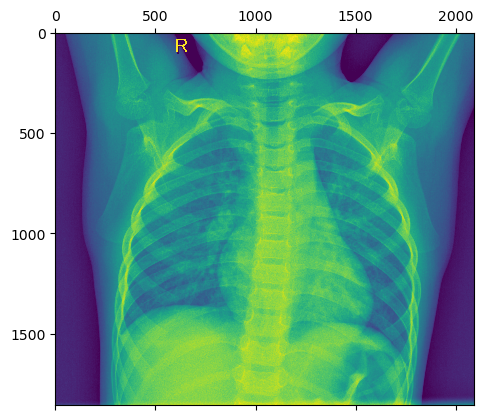

In [15]:
normal_img = cv2.imread(str(data.Normal_Images[0]), 0)
plt.matshow(normal_img)    

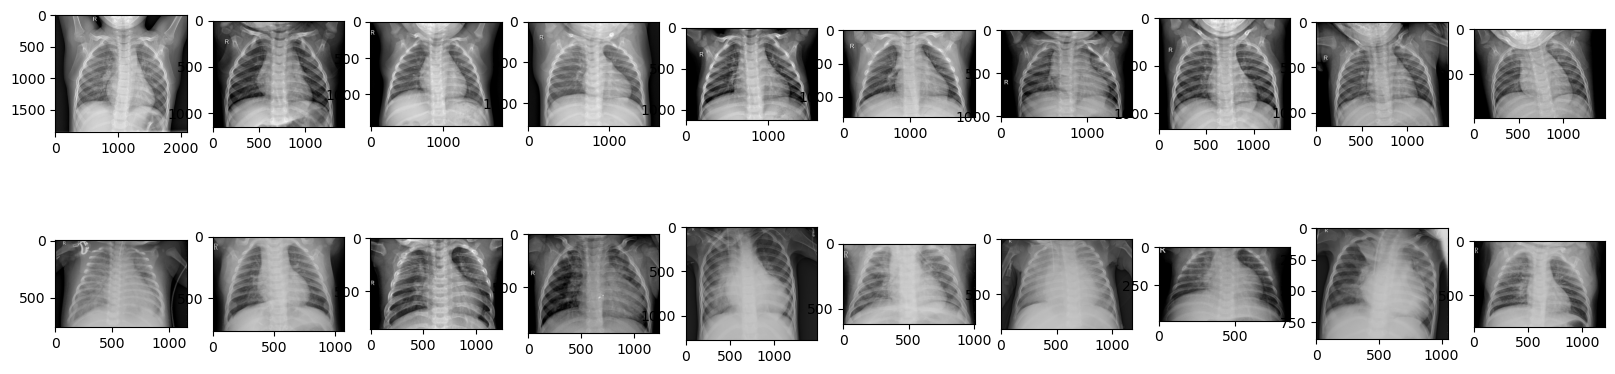

In [19]:
n = 10
plt.figure(figsize=(20, 5))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(cv2.imread(str(data.Normal_Images[i])))
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(True)
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(cv2.imread(str(data.Pneumonia_Images[i])))
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(True)
plt.show()


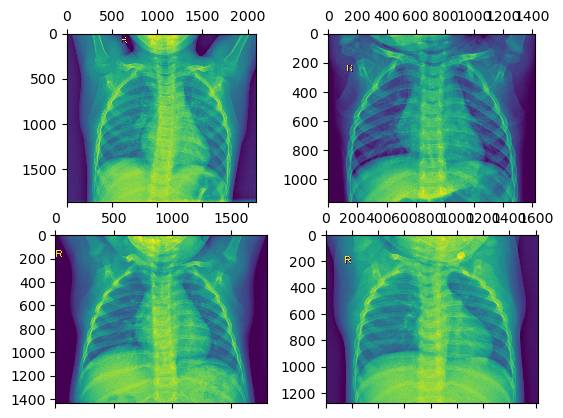

In [20]:
fig, ax = plt.subplots(2,2)
ax[0,0].matshow(cv2.imread(str(data.Normal_Images[0]), 0))
ax[0,1].matshow(cv2.imread(str(data.Normal_Images[1]), 0))
ax[1,0].matshow(cv2.imread(str(data.Normal_Images[2]), 0))
ax[1,1].matshow(cv2.imread(str(data.Normal_Images[3]), 0))

In [21]:
from tqdm import tqdm

In [22]:
data.Normal_Images.loc[0:5]

0    D:\ML DL AI DSBDA\Pneumonia Detection using X-...
1    D:\ML DL AI DSBDA\Pneumonia Detection using X-...
2    D:\ML DL AI DSBDA\Pneumonia Detection using X-...
3    D:\ML DL AI DSBDA\Pneumonia Detection using X-...
4    D:\ML DL AI DSBDA\Pneumonia Detection using X-...
5    D:\ML DL AI DSBDA\Pneumonia Detection using X-...
Name: Normal_Images, dtype: object

In [23]:
data.Pneumonia_Images[0:6]

0    D:\ML DL AI DSBDA\Pneumonia Detection using X-...
1    D:\ML DL AI DSBDA\Pneumonia Detection using X-...
2    D:\ML DL AI DSBDA\Pneumonia Detection using X-...
3    D:\ML DL AI DSBDA\Pneumonia Detection using X-...
4    D:\ML DL AI DSBDA\Pneumonia Detection using X-...
5    D:\ML DL AI DSBDA\Pneumonia Detection using X-...
Name: Pneumonia_Images, dtype: object

In [24]:
import os

In [25]:
path = "D://ML DL AI DSBDA//Pneumonia Detection using X-Ray images//chest_xray//train//"
files = os.listdir(path)
# list of files in path
# sort path from A-Y
files.sort()

In [26]:
print("All the available folders in the directory: \n")
for i in files:
    print(i)

All the available folders in the directory: 

NORMAL
PNEUMONIA


In [28]:
def get_arrays_for_training(files):
    # create list of image and label
    image_array=[]
    label_array=[]

    # loop through each file in files

    for i in tqdm(range(len(files))):
        # list of image in each folder
        sub_file=os.listdir(path+"/"+files[i])
        # let's check length of each folder
        # print(len(sub_file))
        # loop through each sub folder
        for j in range(len(sub_file)):
            # path of each image
            #Example:imagepro/A/image_name1.jpg
            file_path = path + "/" + files[i] + "/" + sub_file[j]
            # read each image
            image = cv2.imread(file_path)
            # resize image by 96x96
            image = cv2.resize(image,(256,256))
            # convert BGR image to RGB image
            image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
            # add this image at image_array
            image_array.append(image)
            # add label to label_array
            # i is number from 0 to len(files)-1
            # so we can use it as label
            label_array.append(i)
            
    return image_array, label_array


In [29]:
images, labels = get_arrays_for_training(files)

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [01:29<00:00, 44.89s/it]


In [32]:
type(images[0]), type(labels[0])

(numpy.ndarray, int)

In [33]:
def convert_to_numpy(image, labels):
    # convert list to array
    image_array = np.array(image)
    label_array = np.array(labels,dtype="float")
    
    return image_array, label_array

new_image, new_labels = convert_to_numpy(images, labels)

In [34]:
# split the dataset into test and train
from sklearn.model_selection import train_test_split
# output train imagelabel spliting size
X_train, X_test, Y_train, Y_test = train_test_split(new_image, new_labels, test_size=0.20)

In [35]:
import gc
gc.collect()

376

In [36]:
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import Flatten

In [38]:
INPUT_DIM = (256, 256, 3)
OUTPUT_DIM = 2

In [39]:
model = Sequential([
    Conv2D(24,(3,3),activation="relu",input_shape=INPUT_DIM),
    BatchNormalization(),
    MaxPooling2D((2,2),strides=2),
    
    Conv2D(64,(3,3),activation="relu",padding="same"),
    Dropout(0.3),
    MaxPooling2D((2,2),strides=2),
    
    Conv2D(64,(3,3),activation="relu",padding="same"),
    Dropout(0.3),
    MaxPooling2D((2,2),strides=2),
    
    Conv2D(128,(3,3),activation="relu",padding="same"),
    Conv2D(128,(3,3),activation="relu",padding="same"),
    Dropout(0.3),
    MaxPooling2D((2,2),strides=2),
    
    Conv2D(128,(3,3),activation="relu",padding="same"),
    Conv2D(128,(3,3),activation="relu",padding="same"),
    Dropout(0.3),
    MaxPooling2D((2,2),strides=2),
    
    Conv2D(256,(3,3),activation="relu",padding="same"),
    Dropout(0.3),
    MaxPooling2D((2,2),strides=2),
    
    Flatten(),
    Dense(2352,activation="relu"),
    Dropout(0.5),
    Dense(OUTPUT_DIM,activation="softmax")
       
])

In [40]:
model.compile(optimizer = "SGD", loss = "sparse_categorical_crossentropy", metrics = ['accuracy'])

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 24)      672       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 24)     96        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 24)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 127, 127, 64)      13888     
                                                                 
 dropout (Dropout)           (None, 127, 127, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 64)       0

In [43]:
import time
start_time = time.time()
CNN = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), batch_size = 32, epochs = 10)
end_time = time.time()

required_time = end_time - start_time
print("Total time required to train the CNN algorithm model: ", required_time)

Epoch 1/10
131/131 [==============================] - 314s 2s/step - loss: 0.2743 - accuracy: 0.8914 - val_loss: 0.4537 - val_accuracy: 0.9243
Epoch 2/10
131/131 [==============================] - 331s 3s/step - loss: 0.1879 - accuracy: 0.9264 - val_loss: 0.3174 - val_accuracy: 0.9301
Epoch 3/10
131/131 [==============================] - 321s 2s/step - loss: 0.1546 - accuracy: 0.9422 - val_loss: 0.2931 - val_accuracy: 0.9540
Epoch 4/10
131/131 [==============================] - 308s 2s/step - loss: 0.1285 - accuracy: 0.9499 - val_loss: 0.3071 - val_accuracy: 0.9416
Epoch 5/10
131/131 [==============================] - 304s 2s/step - loss: 0.1124 - accuracy: 0.9605 - val_loss: 0.2387 - val_accuracy: 0.9665
Epoch 6/10
131/131 [==============================] - 309s 2s/step - loss: 0.0929 - accuracy: 0.9652 - val_loss: 0.2211 - val_accuracy: 0.9655
Epoch 7/10
131/131 [==============================] - 301s 2s/step - loss: 0.0953 - accuracy: 0.9655 - val_loss: 0.2969 - val_accuracy: 0.9425

In [45]:
plt.figure(figsize = (8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

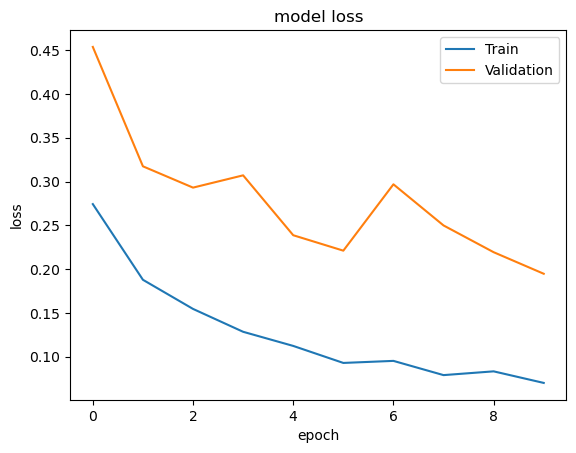

In [46]:
plt.plot(CNN.history['loss'])
plt.plot(CNN.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

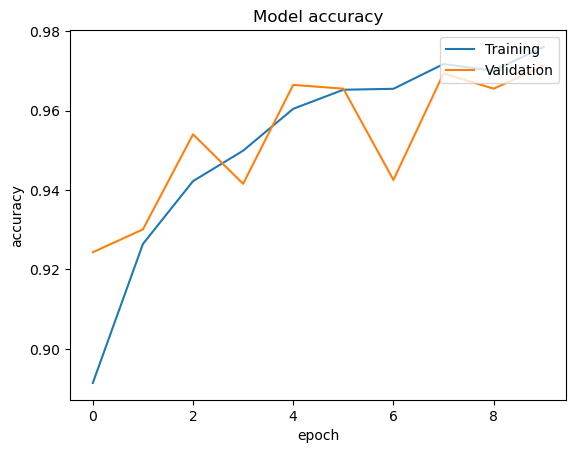

In [47]:
plt.plot(CNN.history['accuracy'])
plt.plot(CNN.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title("Model accuracy")
plt.legend(['Training', "Validation"], loc = 'upper right')
plt.show()


In [48]:
model.save("Trained Model/p_cnn.h5")

In [ ]:
# Load the trained model
model = keras.models.load_model('Trained Model//p_cnn.h5')

# Define the class labels
class_labels = ['Normal', 'Pneumonia']

In [51]:
print("Changed the path to: ")
%cd "D:\\ML DL AI DSBDA\\Pneumonia Detection using X-Ray images\\chest_xray\\test"

Changed the path to: 
D:\ML DL AI DSBDA\Pneumonia Detection using X-Ray images\chest_xray\test


In [62]:
# Function to preprocess the image
def preprocess_image(image):
    # Resize the image to 256x256 pixels
    resized_image = cv2.resize(image, (256, 256))

    # Normalize the image by dividing by 255.0
    normalized_image = resized_image / 255.0

    # Return the preprocessed image
    return normalized_image

# Function to perform pneumonia detection on an image
def detect_pneumonia(image_path):
    # Load the image using OpenCV
    image = cv2.imread(image_path)

    if image is None:
        print("Failed to read the image. Please check the image path.")
        return

    # Preprocess the image
    preprocessed_image = preprocess_image(image)

    # Reshape the image to match the input shape of the model
    preprocessed_image = np.reshape(preprocessed_image, (1,) + preprocessed_image.shape)

    # Perform pneumonia detection using the model
    predictions = model.predict(preprocessed_image)
    predicted_class = np.argmax(predictions)

    # Get the corresponding class label
    predicted_label = class_labels[predicted_class]

    # Display the image with the predicted label
    cv2.putText(image, predicted_label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    cv2.imshow('Image', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Provide the path to the image you want to classify
image_path = "D://ML DL AI DSBDA//Pneumonia Detection using X-Ray images//chest_xray//test//NORMAL//NORMAL2-IM-0372-0001.jpeg"

# Call the function to perform pneumonia detection
detect_pneumonia(image_path)


1/1 [==============================] - 0s 35ms/step


## Output using OpenCV

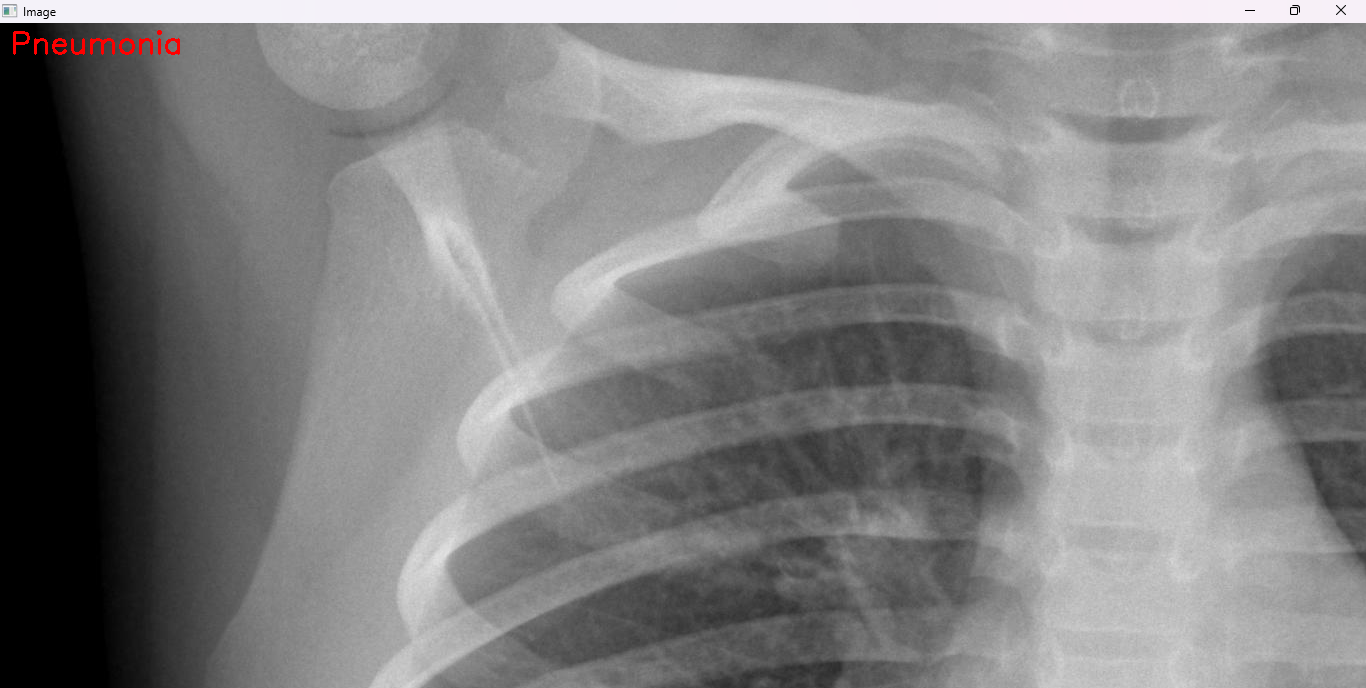

## Output using Matplotlib

1/1 [==============================] - 0s 37ms/step


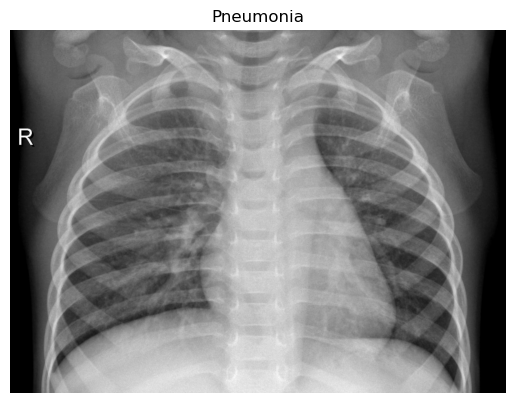

In [63]:
# Function to perform pneumonia detection on an image
def detectAndPlotPneumonia(image_path):
    # Load the image using OpenCV
    image = cv2.imread(image_path)

    if image is None:
        print("Failed to read the image. Please check the image path.")
        return

    # Preprocess the image
    preprocessed_image = preprocess_image(image)

    # Reshape the image to match the input shape of the model
    preprocessed_image = np.reshape(preprocessed_image, (1,) + preprocessed_image.shape)

    # Perform pneumonia detection using the model
    predictions = model.predict(preprocessed_image)
    predicted_class = np.argmax(predictions)

    # Get the corresponding class label
    predicted_label = class_labels[predicted_class]

    # Display the image with the predicted label
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(predicted_label)
    plt.axis('off')
    plt.show()

# Provide the path to the image you want to classify
image_path = "D://ML DL AI DSBDA//Pneumonia Detection using X-Ray images//chest_xray//test//NORMAL//NORMAL2-IM-0305-0001.jpeg"

# Call the function to perform pneumonia detection
detectAndPlotPneumonia(image_path)